In [5]:
# Cargar el dataset de Ames
import pandas as pd
Ames = pd.read_csv("Ames.csv")

# Importar modelos y herramientas de validación de scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Seleccionar características y variable objetivo
X = Ames[["GrLivArea"]]  # Característica: superficie habitable en pies cuadrados
y = Ames["SalePrice"]    # Variable objetivo: precio de venta

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de regresión lineal usando el conjunto de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo con el conjunto de prueba
train_test_score = round(model.score(X_test, y_test), 4)
print(f"Train-Test R^2 Score: {train_test_score}")

# Realizar validación cruzada con 5 particiones (5-Fold Cross-Validation)
cv_scores = cross_val_score(model, X, y, cv=5)
cv_scores_rounded = [round(score, 4) for score in cv_scores]
print(f"Cross-Validation R^2 Scores: {cv_scores_rounded}")

Train-Test R^2 Score: 0.4789
Cross-Validation R^2 Scores: [np.float64(0.4884), np.float64(0.5412), np.float64(0.5214), np.float64(0.5454), np.float64(0.4673)]


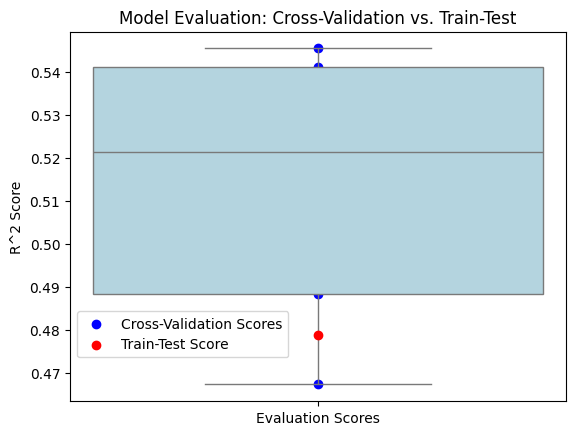

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Importar librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset Ames
Ames = pd.read_csv("Ames.csv")

# Seleccionar característica y variable objetivo
X = Ames[["GrLivArea"]]  # Característica: superficie habitable
y = Ames["SalePrice"]    # Objetivo: precio de venta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular el R² con Train-Test split
train_test_score = round(model.score(X_test, y_test), 4)

# Validación cruzada con 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)
cv_scores_rounded = [round(score, 4) for score in cv_scores]

# Crear DataFrame para graficar los scores de validación cruzada
cv_scores_df = pd.DataFrame(cv_scores_rounded, columns=["Cross-Validation Scores"])

# Graficar boxplot + puntos individuales + puntuación de train-test
sns.boxplot(data=cv_scores_df, y="Cross-Validation Scores", width=0.3, color="lightblue", fliersize=0)
plt.scatter([0] * len(cv_scores_rounded), cv_scores_rounded, color="blue", label="Cross-Validation Scores")
plt.scatter(0, train_test_score, color="red", zorder=5, label="Train-Test Score")

# Ajustar detalles del gráfico
plt.title("Model Evaluation: Cross-Validation vs. Train-Test")
plt.ylabel("R^2 Score")
plt.xticks([0], ["Evaluation Scores"])
plt.legend(loc="lower left", bbox_to_anchor=(0, 0.1))
plt.show()


In [9]:
import pandas as pd

# Importar KFold y otras librerías necesarias
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar el dataset Ames
Ames = pd.read_csv("Ames.csv")

# Seleccionar característica y objetivo, convertir a NumPy arrays para KFold
X = Ames[['GrLivArea']].values  # Característica (2D array)
y = Ames['SalePrice'].values    # Objetivo (1D array)

# Inicializar modelo de regresión lineal y K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)

# Validación cruzada manual con K-Fold
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entrenar el modelo y hacer predicciones
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular y mostrar el R² para este fold
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}\n")

Fold 1:
TRAIN set size: 2063
TEST set size: 516
R^2 score: 0.4884

Fold 2:
TRAIN set size: 2063
TEST set size: 516
R^2 score: 0.5412

Fold 3:
TRAIN set size: 2063
TEST set size: 516
R^2 score: 0.5214

Fold 4:
TRAIN set size: 2063
TEST set size: 516
R^2 score: 0.5454

Fold 5:
TRAIN set size: 2064
TEST set size: 515
R^2 score: 0.4673

